# Decision Tree Regressor

In this article, you will be introduced to a specialized Machine Learning algorithm known as Decision Tree Regression.

### What is a Decision Tree?

The algorithm uses a tree-like structure for decisions to either predict the target value (regression) or predict the target class (classification). Before diving into how decision trees work, let us become familiar with the basic structure and terminologies of a decision tree:

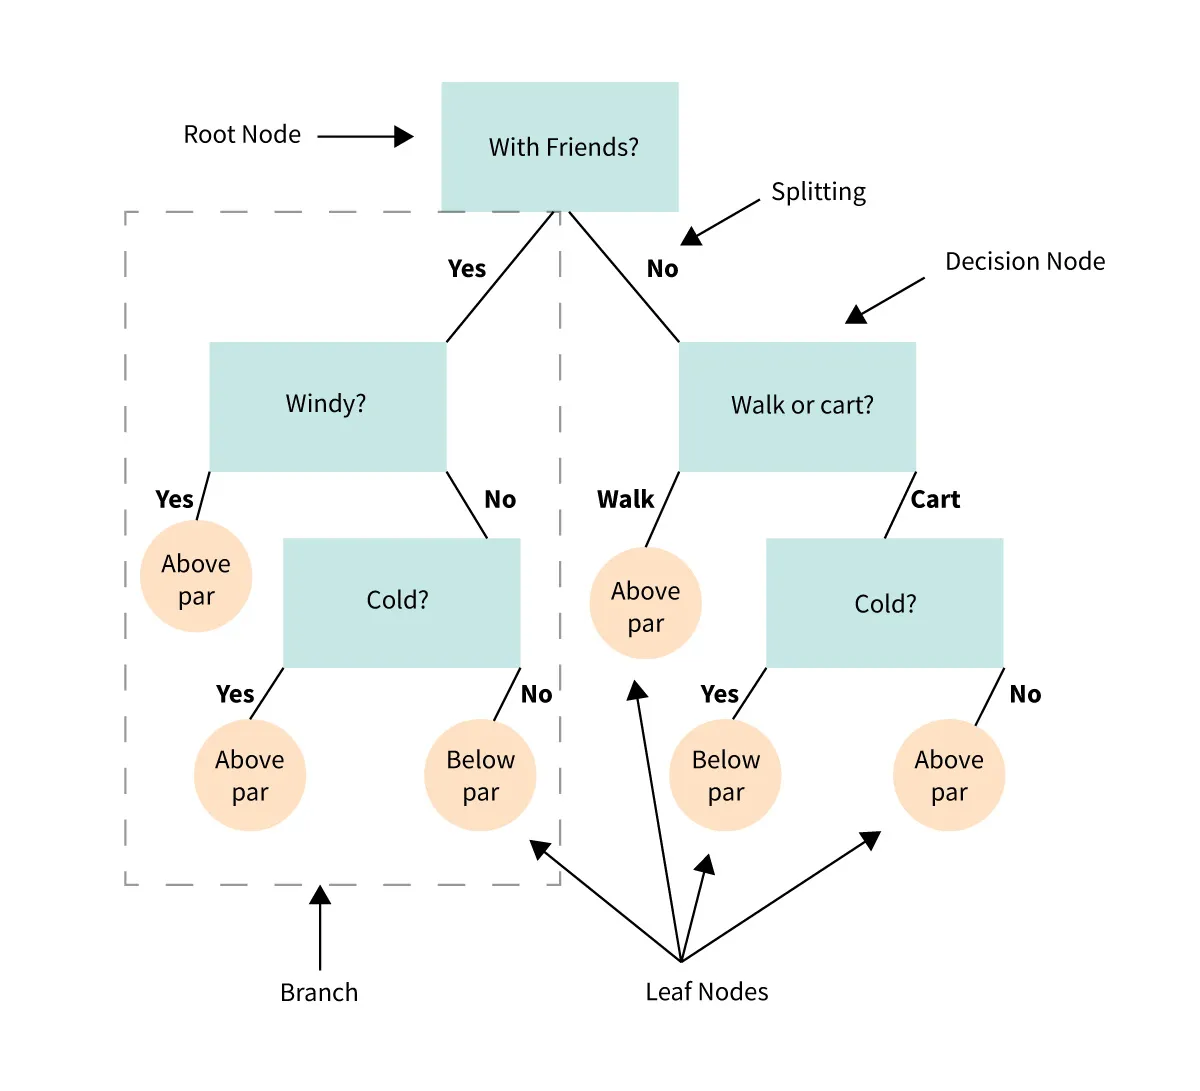


* **Root Node**: The topmost node representing all data points.
* **Splitting**: It refers to dividing a node into two or more sub-nodes.
* **Decision Node**: Nodes further split into sub-nodes; a split node.
* **Leaf / Terminal Node**:  Nodes that do not split; final results.
* **Branch / Sub-Tree**:  Subsection of the entire tree.
* **Parent and Child Node**: Parent node divides into sub-nodes; children are the sub-nodes.

* **Pruning**: Removing sub-nodes of a decision node is called pruning. Pruning is often done in decision trees to prevent overfitting.

## Decision Tree Regressor

Decision trees where the target variable or the terminal node can take continuous values (typically real numbers) are called regression trees.

### What does Decision Tree Regressor do?

A Decision Tree Regressor observes the features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

### What is the difference between a decision tree regressor and a classifier?

Classification trees are used to predict categorical data (yes, no), while regression trees are used to predict numerical data, such as the price of a stock. 

Classification and regression trees are powerful tools for analyzing data.

*Let's explore these in detail with real-life dataset.*



# Problem Statement

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States 2010. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

## Data Importing and Understanding

In [1]:
import pandas as pd

In [2]:
acme_data = pd.read_csv("acme_dataset.csv")
acme_data.shape

(1338, 7)

In [3]:
acme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
acme_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Training Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_inputs,test_inputs,train_target,test_target = train_test_split(acme_data.drop(columns=["charges"]), acme_data["charges"], test_size=0.2, random_state=42)

In [7]:
train_inputs.shape

(1070, 6)

## Transformer Implementation

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
trf1 = ColumnTransformer(transformers=[
    # One Hot Encoding

    ("ohe_sex", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[1]),
    ("ohe_smoker", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[4]),
    ("ohe_region", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[5]),
    # *Handle unknown categories with OneHotEncoder by encoding them as zeros*
    
],remainder="passthrough")

In [10]:
trf1.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_sex',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [1]),
                                ('ohe_smoker',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [4]),
                                ('ohe_region',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [5])])>

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,8)) # Use column count
])

## DT Regressor Model Implementation

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)

## Creating Pipeline

**Pipeline Vs make_pipeline**

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [21]:
pipe = Pipeline([
        ("trf1", trf1),
        ("trf2", trf2),
        ("clf", dt)
    ])

In [22]:
pipe.fit(train_inputs, train_target)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4]),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('clf', DecisionTreeRegressor(max_depth=5))])

## Calculating the loss after training

In [23]:
# Residual
test_pred = pipe.predict(test_inputs)

print("r2score", r2_score(test_target,test_pred))

r2score 0.8336098314514941


## Find optimal tuning parameters for the entire pipeline


In [31]:
from sklearn.model_selection import GridSearchCV

### Try all possible combinations of those parameter values


In [40]:
param_grid = {
    'clf__max_depth':[2,4,8,10,None],
    'clf__criterion':['squared_error', 'friedman_mse', 'absolute_error'],
    'clf__max_features':[0.25,0.5,1.0],
    'clf__min_samples_split':[0.25,0.5,0.1, 1.0]
}

In [41]:
grid_search = GridSearchCV(pipe, param_grid, cv=10)

### What was the best score found during the search?


In [42]:
grid_search.fit(train_inputs, train_target)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'clf__criterion': 'squared_error', 'clf__max_depth': 4, 'clf__max_features': 1.0, 'clf__min_samples_split': 0.1}


## Again Building Pipeline with Best Parameters

In [44]:
best_dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4, max_features = 1.0, min_samples_split= 0.1 )

In [45]:
pipe = Pipeline([
        ("trf1", trf1),
        ("trf2", trf2),
        ("clf", best_dt)
    ])

In [46]:
pipe.fit(train_inputs, train_target)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4]),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('clf',
                 DecisionTreeRegressor(max_depth=4, max_features=1.0,
                                       min_samples_split=0.1))])

In [47]:
# Residual
test_pred = pipe.predict(test_inputs)

print("r2score", r2_score(test_target,test_pred))

r2score 0.8482301864764454


Yes, the model variance has slightly increased.

## Feature importance 

is used in decision trees to determine the contribution of each feature towards making decisions about the target variable.

In decision trees, during the training process, the algorithm evaluates different features and selects the ones that best split the data into homogeneous groups based on the target variable. Feature importance is calculated based on how much each feature reduces impurity or increases information gain when used for splitting the data at each node.

By examining feature importance, we can identify which features are the most relevant or influential in making predictions. This information is valuable for understanding the underlying patterns in the data and can help in **Dmensionsality Reduction and Feature Selection**, model interpretation, and identifying important factors driving the predictions.

## Plotting the Important Features of Dataset

In [55]:
import matplotlib.pyplot as plt

In [76]:
pipe.named_steps['clf'].feature_importances_

array([0.        , 0.71387617, 0.        , 0.        , 0.        ,
       0.10524653, 0.17723421, 0.0036431 ])

In [71]:
# Get the original column names
original_columns = train_inputs.columns.tolist()

# Get the one-hot encoded column names
ohe_indices = pipe.named_steps['trf1'].transformers_[0][2]
ohe_columns = [original_columns[i] for i in ohe_indices]

# Combine the original columns with the one-hot encoded columns and other columns
all_columns = ohe_columns + original_columns[1:]

# Ensure the lengths of original and one-hot encoded columns are the same
if len(ohe_columns) != len(ohe_indices):
    raise ValueError("Lengths of original and one-hot encoded columns don't match.")

# Get feature importances from the decision tree regressor
feature_importances = pipe.named_steps['clf'].feature_importances_

Top 5 Features:
    Feature  Importance
0       sex    0.713876
1       sex    0.177234
2       bmi    0.105247
3  children    0.003643
4    smoker    0.000000
5    region    0.000000


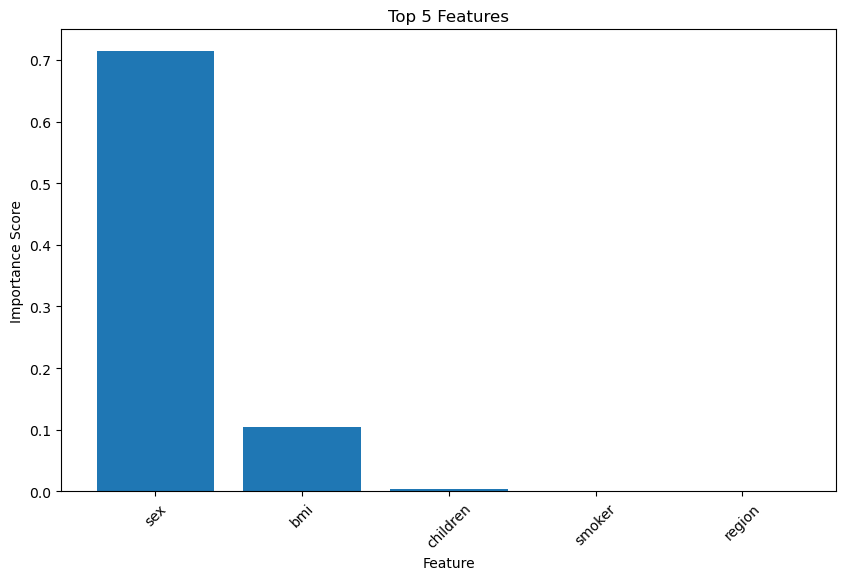

In [77]:
# Select the top 6 features based on importance
top_features = feature_importances.argsort()[-6:][::-1]

# Create a DataFrame with the top features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': [all_columns[i] for i in range(len(top_features))],
    'Importance': feature_importances[top_features]
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 features
print("Top 5 Features:")
print(feature_importance_df.head(9))

# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:9], feature_importance_df['Importance'][:9])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 5 Features')
plt.xticks(rotation=45)
plt.show()

#### Conclusion

* Through our analysis, it has been determined that the most influential factors affecting charges are an individual's `sex` and `BMI` (Body Mass Index). These variables have exhibited a substantial impact on the predicted charges within our model.

* Furthermore, while the number of `children` does exert some influence on charges, its effect is comparatively modest when contrasted with the influence of sex and BMI.

So, we discussed the working of the Decision Tree Regressor along with its implementation in Python.

> Stay tuned for Random Forest and Don't forget to **Star** this Github Repository for more such contents and consider **sharing** with others.